<a href="https://colab.research.google.com/github/deepakrohilla7/M.Sc_Project/blob/main/Msar_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monte Carlo Simulaitions of Differential Photometry

Step1: Build a program for the blackbody spectral energy density.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def blackbody_spectrum(wavelengths, temperature):
    # Constants
    h = 6.62607015e-34
    c = 2.99792458e8
    k = 1.38064852e-23

    wavelengths = wavelengths * 1e-9


    numerator = 2 * h * c ** 2
    exponent = (h * c) / (wavelengths * k * temperature)
    denominator = wavelengths ** 5 * ((np.exp(exponent) - 1))
    spectral_radiance = numerator / denominator


    spectrum = dict(zip(wavelengths, spectral_radiance))

    return spectrum

In [ ]:
min_wavelength = int(input("Enter the minimum wavelength (400-780): "))
max_wavelength = int(input("Enter the maximum wavelength (400-780): "))

while not (min_wavelength == 400 and max_wavelength == 780 and min_wavelength < max_wavelength):
    print("Invalid input. Please make sure the values are within the range and the minimum wavelength is less than the maximum wavelength.")
    min_wavelength = int(input("Enter the minimum wavelength (400-780): "))
    max_wavelength = int(input("Enter the maximum wavelength (400-780): "))

Enter the minimum wavelength (400-780): 400
Enter the maximum wavelength (400-780): 780


In [ ]:
455# Example usage
wavelength_range = np.linspace(min_wavelength, max_wavelength, max_wavelength - min_wavelength+1)  # Wavelength range in nanometers
temperature = 5000  # Temperature in Kelvin

spectrum = blackbody_spectrum(wavelength_range, temperature)
print(spectrum)
print(len(spectrum))

{4.0000000000000003e-07: 8743563008480.827, 4.01e-07: 8791513205902.084, 4.02e-07: 8839213837678.291, 4.0300000000000005e-07: 8886662545717.525, 4.04e-07: 8933857027364.371, 4.0500000000000004e-07: 8980795035048.979, 4.06e-07: 9027474375927.58, 4.0700000000000003e-07: 9073892911514.916, 4.08e-07: 9120048557308.973, 4.09e-07: 9165939282408.25, 4.1000000000000004e-07: 9211563109121.852, 4.11e-07: 9256918112572.9, 4.1200000000000004e-07: 9302002420295.332, 4.13e-07: 9346814211824.54, 4.1400000000000003e-07: 9391351718282.111, 4.1500000000000005e-07: 9435613221954.96, 4.16e-07: 9479597055869.055, 4.1700000000000004e-07: 9523301603358.2, 4.18e-07: 9566725297627.947, 4.1900000000000003e-07: 9609866621314.98, 4.2e-07: 9652724106042.291, 4.21e-07: 9695296331970.334, 4.2200000000000005e-07: 9737581927344.344, 4.23e-07: 9779579568038.287, 4.2400000000000004e-07: 9821287977095.438, 4.25e-07: 9862705924265.82, 4.2600000000000003e-07: 9903832225541.074, 4.2700000000000005e-07: 9944665742686.5, 4.28

In [ ]:
wavelength = np.array(list(spectrum.keys()))
print(wavelength[:5])
print(len(wavelength))

[4.00e-07 4.01e-07 4.02e-07 4.03e-07 4.04e-07]
381


In [ ]:
spectral_radiance = np.array(list(spectrum.values()))
print(spectral_radiance[:5])
print(len(spectral_radiance))

[8.74356301e+12 8.79151321e+12 8.83921384e+12 8.88666255e+12
 8.93385703e+12]
381


Step2: Plot a spectrum between wavelength and spectral_radiance.

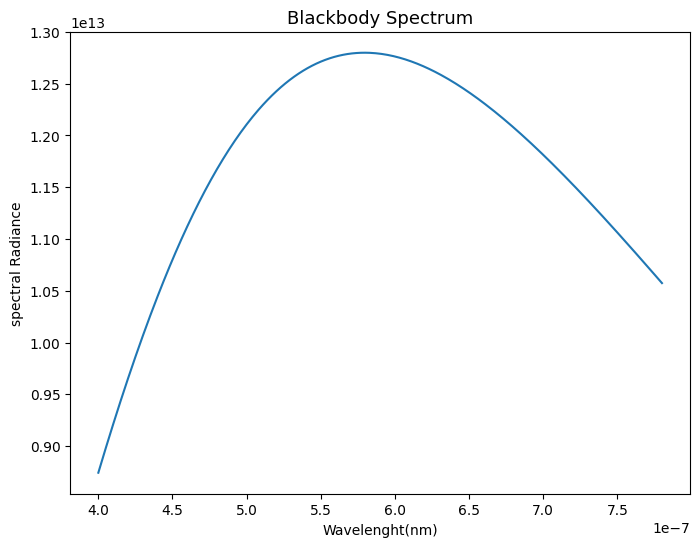

In [ ]:
plt.figure(figsize= (8,6))
plt.plot(wavelength, spectral_radiance)
plt.xlabel("Wavelenght(nm)", size= 10)
plt.ylabel("spectral Radiance", size=10)
plt.title("Blackbody Spectrum", size=13)
plt.show()

Step3: Build a python program to generate a probability distribution based on the blackbody spectral energy density and normalise the probability distribution and plot the graph between probability distribution and wavelength.

In [ ]:
wavelength = np.array(list(spectrum.keys()))
spectral_radiance = np.array(list(spectrum.values()))
print(len(spectral_radiance))

381


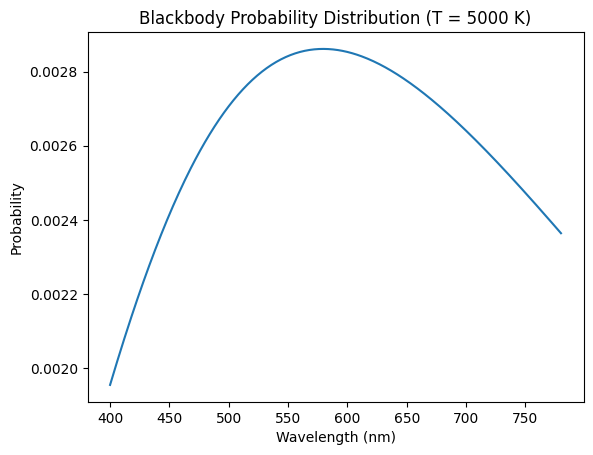

In [ ]:
def generate_probability_distribution(wavelength, temperature):

    # Sum the spectral radiance values
    total_radiance = np.sum(spectral_radiance)

    # Calculate the probability distribution by dividing by the total radiance
    probability_distribution = spectral_radiance / total_radiance

    return probability_distribution

def plot_probability_distribution(wavelength, temperature):
    probability_distribution = generate_probability_distribution(wavelength, temperature)

    # Plot the probability distribution
    plt.plot(wavelength, probability_distribution)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Probability')
    plt.title('Blackbody Probability Distribution (T = {} K)'.format(temperature))
    plt.show()

# Example usage
wavelength = np.linspace(min_wavelength, max_wavelength, max_wavelength - min_wavelength+1)  # Wavelength range in nanometers
temperature = 5000  # Temperature in Kelvin
plot_probability_distribution(wavelength, temperature)

Step4: Build a python program that can generate a finite number of photons using the probability_distribution.

In [ ]:
probabilities= generate_probability_distribution(wavelength, temperature)
print(probabilities[:5])

[0.00195463 0.00196535 0.00197601 0.00198662 0.00199717]


In [ ]:
print(wavelength[:5])
print(len(wavelength))

[400. 401. 402. 403. 404.]
381


In [ ]:
wave_prob = list(zip(wavelength, probabilities))
print(wave_prob[:5])

[(400.0, 0.0019546288349696133), (401.0, 0.0019653481308025784), (402.0, 0.0019760116360836187), (403.0, 0.0019866188236598485), (404.0, 0.001997169178771248)]


In [ ]:
import random
import numpy as np

def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelengths, probabilities = zip(*wave_prob)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelengths[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def main():
    wave_prob= [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum
    num_photons = 100

    simulated_photons = generate_simulated_photons(wave_prob, num_photons)
    print(simulated_photons)
    print("length", len(simulated_photons))


if __name__ == '__main__':
    main()

[(705.0, 1.7588652482269505), (646.0, 1.9195046439628483), (500.0, 2.48), (715.0, 1.7342657342657342), (535.0, 2.317757009345794), (547.0, 2.26691042047532), (608.0, 2.039473684210526), (521.0, 2.380038387715931), (571.0, 2.171628721541156), (441.0, 2.811791383219955), (516.0, 2.4031007751937983), (441.0, 2.811791383219955), (402.0, 3.084577114427861), (676.0, 1.834319526627219), (585.0, 2.1196581196581197), (514.0, 2.412451361867704), (673.0, 1.8424962852897473), (644.0, 1.9254658385093169), (419.0, 2.9594272076372317), (435.0, 2.8505747126436782), (415.0, 2.9879518072289155), (471.0, 2.632696390658174), (669.0, 1.8535127055306428), (624.0, 1.9871794871794872), (637.0, 1.946624803767661), (629.0, 1.971383147853736), (521.0, 2.380038387715931), (675.0, 1.837037037037037), (649.0, 1.9106317411402156), (544.0, 2.2794117647058822), (541.0, 2.292051756007394), (551.0, 2.250453720508167), (712.0, 1.7415730337078652), (600.0, 2.066666666666667), (746.0, 1.6621983914209115), (423.0, 2.9314420

Step5: Build a program to count the generated photons in each wavelength bin.

In [ ]:
num_photons= 100
simulated_photons = generate_simulated_photons(wave_prob, num_photons)

print(simulated_photons)
print(len(simulated_photons))

[(756.0, 1.6402116402116402), (586.0, 2.1160409556313993), (432.0, 2.8703703703703702), (773.0, 1.6041397153945667), (734.0, 1.6893732970027249), (576.0, 2.1527777777777777), (525.0, 2.361904761904762), (542.0, 2.2878228782287824), (635.0, 1.952755905511811), (410.0, 3.024390243902439), (441.0, 2.811791383219955), (708.0, 1.7514124293785311), (550.0, 2.2545454545454544), (522.0, 2.375478927203065), (489.0, 2.5357873210633946), (575.0, 2.1565217391304348), (555.0, 2.234234234234234), (760.0, 1.631578947368421), (448.0, 2.767857142857143), (607.0, 2.042833607907743), (507.0, 2.445759368836292), (652.0, 1.901840490797546), (419.0, 2.9594272076372317), (640.0, 1.9375), (604.0, 2.052980132450331), (614.0, 2.019543973941368), (757.0, 1.6380449141347424), (532.0, 2.330827067669173), (589.0, 2.1052631578947367), (770.0, 1.6103896103896105), (413.0, 3.002421307506053), (711.0, 1.7440225035161745), (436.0, 2.8440366972477062), (665.0, 1.8646616541353382), (428.0, 2.897196261682243), (533.0, 2.32

In [ ]:
import collections
counter = collections.Counter(simulated_photons)
counter

Counter({(756.0, 1.6402116402116402): 1,
         (586.0, 2.1160409556313993): 1,
         (432.0, 2.8703703703703702): 1,
         (773.0, 1.6041397153945667): 2,
         (734.0, 1.6893732970027249): 1,
         (576.0, 2.1527777777777777): 1,
         (525.0, 2.361904761904762): 3,
         (542.0, 2.2878228782287824): 1,
         (635.0, 1.952755905511811): 2,
         (410.0, 3.024390243902439): 1,
         (441.0, 2.811791383219955): 1,
         (708.0, 1.7514124293785311): 1,
         (550.0, 2.2545454545454544): 1,
         (522.0, 2.375478927203065): 1,
         (489.0, 2.5357873210633946): 1,
         (575.0, 2.1565217391304348): 2,
         (555.0, 2.234234234234234): 2,
         (760.0, 1.631578947368421): 1,
         (448.0, 2.767857142857143): 1,
         (607.0, 2.042833607907743): 1,
         (507.0, 2.445759368836292): 1,
         (652.0, 1.901840490797546): 2,
         (419.0, 2.9594272076372317): 1,
         (640.0, 1.9375): 1,
         (604.0, 2.052980132450331): 1,

In [ ]:
print(len(counter))

89


Step6: Build a program to iterate the step5 for the iteration and num_photons as given by the user.

In [ ]:
def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    return photon_counts


def main():
    wave_prob = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    num_iterations = int(input("Enter the number of iterations: "))

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")

        num_photons = int(input("Enter the number of photons to generate: "))

        simulated_photons = generate_simulated_photons(wave_prob, num_photons)
        print(simulated_photons)
        print("Length:", len(simulated_photons))

        photon_counts = count_photons_by_wavelength(simulated_photons)
        print("Photon Counts:")
        for wavelength, count in photon_counts.items():
            print("Wavelength:", wavelength, "- Count:", count)

        wavelength_start_point = int(input("Enter the start point of wavelength range: "))
        wavelength_end_point = int(input("Enter the end point of wavelength range: "))

        if wavelength_start_point < 400 or wavelength_end_point > 780:
            print("Invalid wavelength range!")
        else:
            filtered_counts = [(wavelength, count) for wavelength, count in photon_counts.items() if wavelength_start_point <= wavelength <= wavelength_end_point]
            print(f"Photon Counts between {wavelength_start_point} and {wavelength_end_point}:")
            for wavelength, count in filtered_counts:
                print("Wavelength:", wavelength, "- Count:", count)

            count_sum = sum(count for wavelength, count in filtered_counts)
            print(f"Sum of counts between {wavelength_start_point} and {wavelength_end_point}: {count_sum}")

        print("\n")

if __name__ == '__main__':
    main()

Enter the number of iterations: 1
Iteration 1:
Enter the number of photons to generate: 222
[(548.0, 2.2627737226277373), (684.0, 1.8128654970760234), (427.0, 2.9039812646370025), (458.0, 2.7074235807860263), (528.0, 2.3484848484848486), (684.0, 1.8128654970760234), (597.0, 2.0770519262981573), (477.0, 2.59958071278826), (596.0, 2.0805369127516777), (517.0, 2.3984526112185685), (503.0, 2.4652087475149105), (730.0, 1.6986301369863013), (687.0, 1.8049490538573507), (524.0, 2.366412213740458), (709.0, 1.7489421720733427), (488.0, 2.540983606557377), (479.0, 2.5887265135699375), (646.0, 1.9195046439628483), (580.0, 2.1379310344827585), (494.0, 2.5101214574898787), (709.0, 1.7489421720733427), (716.0, 1.7318435754189945), (557.0, 2.2262118491921004), (703.0, 1.763869132290185), (646.0, 1.9195046439628483), (443.0, 2.799097065462754), (539.0, 2.300556586270872), (650.0, 1.9076923076923078), (541.0, 2.292051756007394), (541.0, 2.292051756007394), (650.0, 1.9076923076923078), (585.0, 2.1196581

KeyboardInterrupt: ignored

In [ ]:
#Step6(b):- Some modification in step6 as whenever there is invalid wavelength range there it will ask again the user to enter the valid values until it doesn't get the exact values.

In [ ]:
import random
import numpy as np
import collections

def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelengths, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelengths[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    return photon_counts


def main():
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    num_iterations = int(input("Enter the number of iterations: "))

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")

        num_photons = int(input("Enter the number of photons to generate: "))

        simulated_photons = generate_simulated_photons(wave_prob, num_photons)
        print(simulated_photons)
        print("Length:", len(simulated_photons))

        photon_counts = count_photons_by_wavelength(simulated_photons)
        print("Photon Counts:")
        for wavelength, count in photon_counts.items():
            print("Wavelength:", wavelength, "- Count:", count)

        while True:
            wavelength_start_point = int(input("Enter the start point of wavelength range: "))
            wavelength_end_point = int(input("Enter the end point of wavelength range: "))

            if wavelength_start_point < 400 or wavelength_end_point > 780:
                print("Invalid wavelength range! Please enter valid values.")
            else:
                filtered_counts = [(wavelength, count) for wavelength, count in photon_counts.items() if wavelength_start_point <= wavelength <= wavelength_end_point]
                print(f"Photon Counts between {wavelength_start_point} and {wavelength_end_point}:")
                for wavelength, count in filtered_counts:
                    print("Wavelength:", wavelength, "- Count:", count)

                count_sum = sum(count for wavelength, count in filtered_counts)
                print(f"Sum of counts between {wavelength_start_point} and {wavelength_end_point}: {count_sum}")
                break

        print("\n")


if __name__ == '__main__':
    main()

Enter the number of iterations: 1
Iteration 1:
Enter the number of photons to generate: 234
[(713.8258575197889, 1.737118355880831), (568.4432717678101, 2.181396212402525), (521.3192612137203, 2.37858082801903), (511.2928759894459, 2.4252244813706265), (702.796833773087, 1.7643790358912752), (429.0765171503958, 2.8899274381994835), (700.7915567282322, 1.7694277108433736), (666.7018469656991, 1.8599018521450057), (500.26385224274406, 2.478691983122363), (603.5356200527705, 2.0545597621753955), (631.6094986807387, 1.9632383657782606), (491.2401055408971, 2.5242238693737242), (455.1451187335092, 2.7244057971014493), (733.8786279683377, 1.6896526928884734), (501.2664907651715, 2.4737340772712915), (762.9551451187335, 1.6252593719739936), (740.8970976253297, 1.6736467236467238), (620.5804749340369, 1.9981292517006803), (607.5461741424801, 2.0409971336749764), (689.7625329815303, 1.7977201438298525), (477.2031662269129, 2.5984739577573817), (612.5593667546174, 2.024293590627154), (605.540897

In [ ]:
# Step6(c):- Splitting the one main user-defined function" def main()" into many different user-defined function to understand the things in a clear manner and easily.

In [ ]:
import random
import numpy as np
import collections


def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelengths, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelengths[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    return photon_counts


def get_wavelength_range():
    while True:
        wavelength_start_point = int(input("Enter the start point of wavelength range: "))
        wavelength_end_point = int(input("Enter the end point of wavelength range: "))

        if wavelength_start_point < 400 or wavelength_end_point > 780:
            print("Invalid wavelength range! Please enter valid values.")
        else:
            return wavelength_start_point, wavelength_end_point


def print_simulated_photons(simulated_photons):
    print(simulated_photons)
    print("Length:", len(simulated_photons))


def print_photon_counts(photon_counts):
    print("Photon Counts:")
    for wavelength, count in photon_counts.items():
        print("Wavelength:", wavelength, "- Count:", count)


def print_filtered_counts(filtered_counts, wavelength_start_point, wavelength_end_point):
    print(f"Photon Counts between {wavelength_start_point} and {wavelength_end_point}:")
    for wavelength, count in filtered_counts:
        print("Wavelength:", wavelength, "- Count:", count)

    count_sum = sum(count for _, count in filtered_counts)
    print(f"Sum of counts between {wavelength_start_point} and {wavelength_end_point}: {count_sum}")


def simulate_photon_counts(spectrum, num_photons, wavelength_start_point, wavelength_end_point):
    simulated_photons = generate_simulated_photons(wave_prob, num_photons)
    photon_counts = count_photons_by_wavelength(simulated_photons)

    print_simulated_photons(simulated_photons)
    print_photon_counts(photon_counts)

    filtered_counts = [(wavelength, count) for wavelength, count in photon_counts.items() if
                       wavelength_start_point <= wavelength <= wavelength_end_point]

    print_filtered_counts(filtered_counts, wavelength_start_point, wavelength_end_point)


def perform_simulation():
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    num_iterations = int(input("Enter the number of iterations: "))

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")

        num_photons = int(input("Enter the number of photons to generate: "))

        wavelength_start_point, wavelength_end_point = get_wavelength_range()

        simulate_photon_counts(spectrum, num_photons, wavelength_start_point, wavelength_end_point)

        print("\n")


if __name__ == '__main__':
    perform_simulation()
'''In this version, the main() function has been split into the following user-defined functions:

get_wavelength_range(): Prompts the user to enter the wavelength range and validates the input.
print_simulated_photons(simulated_photons): Prints the list of simulated photons and its length.
print_photon_counts(photon_counts): Prints the photon counts for each wavelength.
print_filtered_counts(filtered_counts, wavelength_start_point, wavelength_end_point): Prints the filtered photon counts within the specified wavelength range.
simulate_photon_counts(spectrum, num_photons, wavelength_start_point, wavelength_end_point): Combines the steps to generate simulated photons, count photon frequencies, and print the results.
The perform_simulation() function still serves as the entry point and orchestrates the simulation by calling the appropriate functions.'''

Enter the number of iterations: 1
Iteration 1:
Enter the number of photons to generate: 5555
Enter the start point of wavelength range: 453
Enter the end point of wavelength range: 678
[(478.20580474934036, 2.5930258221143236), (580.4749340369393, 2.136181818181818), (447.1240105540897, 2.773279830048389), (679.7361477572559, 1.8242372486608183), (633.6147757255936, 1.9570250687099193), (538.3641160949868, 2.3032738678690454), (555.4089709762533, 2.2325890736342044), (496.2532981530343, 2.4987239472564866), (429.0765171503958, 2.8899274381994835), (773.9841688654353, 1.602099952273812), (516.3060686015831, 2.4016762060506953), (776.9920844327177, 1.5958978538440642), (612.5593667546174, 2.024293590627154), (554.4063324538258, 2.236626689510756), (522.3218997361478, 2.3740149525156595), (644.6437994722955, 1.9235428945645054), (592.5065963060686, 2.0928037050231567), (506.2796833773087, 2.449239107775693), (493.24538258575194, 2.513961698940837), (495.25065963060683, 2.5037826318593503)

'In this version, the main() function has been split into the following user-defined functions:\n\nget_wavelength_range(): Prompts the user to enter the wavelength range and validates the input.\nprint_simulated_photons(simulated_photons): Prints the list of simulated photons and its length.\nprint_photon_counts(photon_counts): Prints the photon counts for each wavelength.\nprint_filtered_counts(filtered_counts, wavelength_start_point, wavelength_end_point): Prints the filtered photon counts within the specified wavelength range.\nsimulate_photon_counts(spectrum, num_photons, wavelength_start_point, wavelength_end_point): Combines the steps to generate simulated photons, count photon frequencies, and print the results.\nThe perform_simulation() function still serves as the entry point and orchestrates the simulation by calling the appropriate functions.'

In [ ]:
# Step7: Build a program by just some modification in step6 by putting wavelength in ascending order.

In [ ]:

import random
import numpy as np
import collections

def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelengths, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelengths[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    sorted_counts = sorted(photon_counts.items(), key=lambda x: x[0])  # Sort by wavelength
    return sorted_counts


def main():
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    num_iterations = int(input("Enter the number of iterations: "))

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")

        num_photons = int(input("Enter the number of photons to generate: "))

        simulated_photons = generate_simulated_photons(wave_prob, num_photons)
        print(simulated_photons)
        print("Length:", len(simulated_photons))

        photon_counts = count_photons_by_wavelength(simulated_photons)
        sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength

        print("Photon Counts:")
        for wavelength, count in sorted_counts:
            print("Wavelength:", wavelength, "- Count:", count)

        sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
        print("Sorted Wavelengths:", sorted_wavelengths)

        wavelength_start_point = int(input("Enter the start point of wavelength range: "))
        wavelength_end_point = int(input("Enter the end point of wavelength range: "))

        if wavelength_start_point < 400 or wavelength_end_point > 780: # make these limits variables, and check end point as well
            print("Invalid wavelength range!")
        else:
            filtered_counts = [(wavelength, count) for wavelength, count in sorted_counts if wavelength_start_point <= wavelength <= wavelength_end_point]
            print(f"Photon Counts between {wavelength_start_point} and {wavelength_end_point}:")
            for wavelength, count in filtered_counts:
                print("Wavelength:", wavelength, "- Count:", count)

            count_sum = sum(count for wavelength, count in filtered_counts)
            print(f"Sum of counts between {wavelength_start_point} and {wavelength_end_point}: {count_sum}")

        print("\n")


if __name__ == '__main__':
    main()

Enter the number of iterations: 1
Iteration 1:
Enter the number of photons to generate: 4567
[(527.3350923482849, 2.3514460122085463), (553.4036939313984, 2.240678935825308), (484.22163588390504, 2.5608108108108105), (759.9472295514512, 1.631692243594195), (595.5145118733509, 2.082233052724856), (587.4934036939314, 2.1106619958681394), (704.8021108179419, 1.759359089547769), (535.3562005277045, 2.316214884179399), (687.7572559366754, 1.8029617125757693), (562.4274406332454, 2.2047288421842746), (678.7335092348285, 1.8269320478930182), (470.18469656992085, 2.6372615039281704), (759.9472295514512, 1.631692243594195), (621.5831134564644, 1.9949061889803887), (753.9313984168865, 1.6447119759221671), (557.4142480211082, 2.22455741740036), (627.5989445910291, 1.9757840746657696), (513.2981530343008, 2.415749974298345), (517.3087071240105, 2.3970213200040806), (543.377308707124, 2.28202389045353), (619.5778364116095, 2.001362745933055), (668.707124010554, 1.854324494949495), (408.021108179419

In [ ]:
# Step7(b)- Do some modification is step 7 by inserting the valid wavlength range until it doesn't come with the valid wavelength range.

In [ ]:
import random
import numpy as np
import collections

def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelengths, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelengths[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    sorted_counts = sorted(photon_counts.items(), key=lambda x: x[0])  # Sort by wavelength
    return sorted_counts


def main():
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    num_iterations = int(input("Enter the number of iterations: "))

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")

        num_photons = int(input("Enter the number of photons to generate: "))

        simulated_photons = generate_simulated_photons(wave_prob, num_photons)
        print(simulated_photons)
        print("Length:", len(simulated_photons))

        photon_counts = count_photons_by_wavelength(simulated_photons)
        sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength

        print("Photon Counts:")
        for wavelength, count in sorted_counts:
            print("Wavelength:", wavelength, "- Count:", count)

        sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
        print("Sorted Wavelengths:", sorted_wavelengths)

        while True:
            wavelength_start_point = int(input("Enter the start point of wavelength range: "))
            wavelength_end_point = int(input("Enter the end point of wavelength range: "))

            if wavelength_start_point < 400 or wavelength_end_point > 780 or wavelength_start_point >= wavelength_end_point:
                print("Invalid wavelength range! Please try again.")
            else:
                break

        filtered_counts = [(wavelength, count) for wavelength, count in sorted_counts if wavelength_start_point <= wavelength <= wavelength_end_point]
        print(f"Photon Counts between {wavelength_start_point} and {wavelength_end_point}:")
        for wavelength, count in filtered_counts:
            print("Wavelength:", wavelength, "- Count:", count)

        count_sum = sum(count for wavelength, count in filtered_counts)
        print(f"Sum of counts between {wavelength_start_point} and {wavelength_end_point}: {count_sum}")

        print("\n")


if __name__ == '__main__':
    main()

Enter the number of iterations: 1
Iteration 1:
Enter the number of photons to generate: 4566
[(510.29023746701847, 2.429989658738366), (547.3878627968338, 2.2653041550178346), (724.8548812664908, 1.7106872451951076), (423.06068601583115, 2.931021579144318), (690.7651715039578, 1.7951107715813597), (749.9208443271768, 1.6535078460347616), (712.8232189973614, 1.7395617411904059), (774.9868073878628, 1.6000272368241863), (730.8707124010554, 1.696606498194946), (700.7915567282322, 1.7694277108433736), (559.4195250659631, 2.216583341194227), (562.4274406332454, 2.2047288421842746), (711.820580474934, 1.7420120097857514), (485.2242744063324, 2.555519303969549), (733.8786279683377, 1.6896526928884734), (532.3482849604221, 2.3293021411578114), (516.3060686015831, 2.4016762060506953), (705.8047493403694, 1.756859813084112), (746.9129287598944, 1.6601667373180728), (510.29023746701847, 2.429989658738366), (621.5831134564644, 1.9949061889803887), (586.4907651715039, 2.1142702897246717), (502.2691

In [ ]:
# Step7(c):- Split the (b)part of def main() function into many user-defined function.

In [ ]:
import random
import numpy as np
import collections


def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelengths, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelengths[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    sorted_counts = sorted(photon_counts.items(), key=lambda x: x[0])  # Sort by wavelength
    return sorted_counts


def get_wavelength_range():
    while True:
        wavelength_start_point = int(input("Enter the start point of wavelength range: "))
        wavelength_end_point = int(input("Enter the end point of wavelength range: "))

        if wavelength_start_point < 400 or wavelength_end_point > 780 or wavelength_start_point >= wavelength_end_point:
            print("Invalid wavelength range! Please try again.")
        else:
            return wavelength_start_point, wavelength_end_point


def print_simulated_photons(simulated_photons):
    print(simulated_photons)
    print("Length:", len(simulated_photons))


def print_photon_counts(sorted_counts):
    print("Photon Counts:")
    for wavelength, count in sorted_counts:
        print("Wavelength:", wavelength, "- Count:", count)


def print_sorted_wavelengths(sorted_counts):
    sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
    print("Sorted Wavelengths:", sorted_wavelengths)


def print_filtered_counts(filtered_counts, wavelength_start_point, wavelength_end_point):
    print(f"Photon Counts between {wavelength_start_point} and {wavelength_end_point}:")
    for wavelength, count in filtered_counts:
        print("Wavelength:", wavelength, "- Count:", count)

    count_sum = sum(count for wavelength, count in filtered_counts)
    print(f"Sum of counts between {wavelength_start_point} and {wavelength_end_point}: {count_sum}")


def simulate_photon_counts(spectrum, num_photons):
    simulated_photons = generate_simulated_photons(wave_prob, num_photons)
    print_simulated_photons(simulated_photons)

    photon_counts = count_photons_by_wavelength(simulated_photons)
    sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength
    print_photon_counts(sorted_counts)

    print_sorted_wavelengths(sorted_counts)

    while True:
        wavelength_start_point, wavelength_end_point = get_wavelength_range()
        if wavelength_start_point < 400 or wavelength_end_point > 780 or wavelength_start_point >= wavelength_end_point:
            print("Invalid wavelength range! Please try again.")
        else:
            break

    filtered_counts = [(wavelength, count) for wavelength, count in sorted_counts if
                       wavelength_start_point <= wavelength <= wavelength_end_point]
    print_filtered_counts(filtered_counts, wavelength_start_point, wavelength_end_point)


def perform_simulation():
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    num_iterations = int(input("Enter the number of iterations: "))

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")
        num_photons = int(input("Enter the number of photons to generate: "))
        simulate_photon_counts(wave_prob, num_photons)
        print("\n")


if __name__ == '__main__':
    perform_simulation()
# I've split the code into functions: generate_simulated_photons, count_photons_by_wavelength, get_wavelength_range, print_simulated_photons, print_photon_counts, print_sorted_wavelengths, print_filtered_counts, and simulate_photon_counts.

Enter the number of iterations: 1
Iteration 1:
Enter the number of photons to generate: 6666
[(559.4195250659631, 2.216583341194227), (738.8918205804749, 1.678188830167119), (636.622691292876, 1.9477785145888595), (448.12664907651714, 2.7670748940178993), (744.9076517150395, 1.6646358741853218), (656.6754617414248, 1.8882995821279331), (775.9894459102902, 1.5979598775926556), (663.6939313984169, 1.8683310805438498), (497.2559366754617, 2.4936856627401043), (717.8364116094987, 1.727413070646181), (571.4511873350923, 2.1699141194939515), (420.0527704485488, 2.952010050251256), (559.4195250659631, 2.216583341194227), (522.3218997361478, 2.3740149525156595), (645.6464379947229, 1.9205557825909279), (618.575197889182, 2.0046067224023205), (731.8733509234828, 1.694282212127767), (570.4485488126649, 2.1737280296022203), (690.7651715039578, 1.7951107715813597), (564.4327176781003, 2.1968960359012715), (406.0158311345646, 3.0540681050168965), (745.910290237467, 1.6623983020870179), (716.8337730

In [ ]:
import random
import numpy as np
import collections

def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelengths, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelengths[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    sorted_counts = sorted(photon_counts.items(), key=lambda x: x[0])  # Sort by wavelength
    return sorted_counts


def main():
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    num_iterations = int(input("Enter the number of iterations: "))

    while True:
        wavelength_start_point = int(input("Enter the start point of wavelength range: "))
        wavelength_end_point = int(input("Enter the end point of wavelength range: "))

        if wavelength_start_point < 400 or wavelength_end_point > 780 or wavelength_start_point >= wavelength_end_point:
            print("Invalid wavelength range! Please try again.")
        else:
            break

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")

        num_photons = int(input("Enter the number of photons to generate: "))

        simulated_photons = generate_simulated_photons(wave_prob, num_photons)
        print(simulated_photons)
        print("Length:", len(simulated_photons))

        photon_counts = count_photons_by_wavelength(simulated_photons)
        sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength

        print("Photon Counts:")
        for wavelength, count in sorted_counts:
            print("Wavelength:", wavelength, "- Count:", count)

        sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
        print("Sorted Wavelengths:", sorted_wavelengths)

        filtered_counts = [(wavelength, count) for wavelength, count in sorted_counts if wavelength_start_point <= wavelength <= wavelength_end_point]
        print(f"Photon Counts between {wavelength_start_point} and {wavelength_end_point}:")
        for wavelength, count in filtered_counts:
            print("Wavelength:", wavelength, "- Count:", count)

        count_sum = sum(count for wavelength, count in filtered_counts)
        print(f"Sum of counts between {wavelength_start_point} and {wavelength_end_point}: {count_sum}")

        print("\n")


if __name__ == '__main__':
    main()

KeyboardInterrupt: ignored

In [ ]:
#Step8: Generate plot of counts of simulated photons by wavelength

Enter the number of iterations: 1
Iteration 1:
Enter the number of photons to generate: 5557
[(686.7546174142481, 1.805593975718457), (602.532981530343, 2.0579786302329652), (589.4986807387863, 2.1034822307761165), (639.6306068601583, 1.938618925831202), (497.2559366754617, 2.4936856627401043), (742.9023746701846, 1.6691291376616), (631.6094986807387, 1.9632383657782606), (533.3509234828496, 2.324923320470961), (549.3931398416887, 2.2570358274901543), (482.21635883905014, 2.571459838038958), (496.2532981530343, 2.4987239472564866), (502.26912928759896, 2.4687959655389786), (777.9947229551451, 1.593841144950146), (478.20580474934036, 2.5930258221143236), (469.1820580474934, 2.6428973118884267), (665.6992084432718, 1.862703131193024), (518.311345646438, 2.392384443086948), (494.2480211081794, 2.5088618407004057), (678.7335092348285, 1.8269320478930182), (695.778364116095, 1.7821767159651118), (717.8364116094987, 1.727413070646181), (643.6411609498681, 1.9265393129458064), (612.5593667546

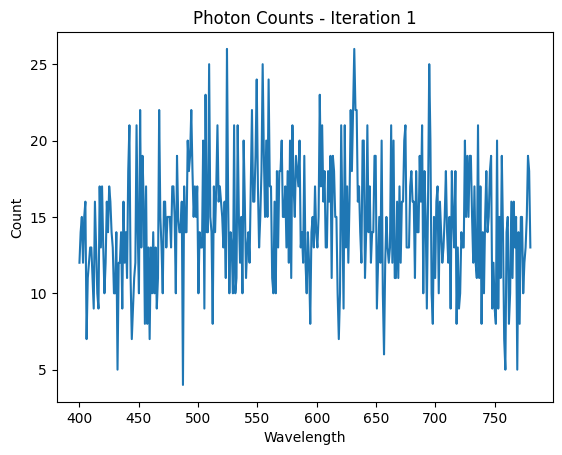

In [ ]:
import random
import numpy as np
import collections
import matplotlib.pyplot as plt

def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelengths, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelengths[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    sorted_counts = sorted(photon_counts.items(), key=lambda x: x[0])  # Sort by wavelength
    return sorted_counts


def main():
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    num_iterations = int(input("Enter the number of iterations: "))

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")

        num_photons = int(input("Enter the number of photons to generate: "))

        simulated_photons = generate_simulated_photons(wave_prob, num_photons)
        print(simulated_photons)
        print("Length:", len(simulated_photons))

        photon_counts = count_photons_by_wavelength(simulated_photons)
        sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength

        wavelengths = [wavelength for wavelength, _ in sorted_counts]
        counts = [count for _, count in sorted_counts]

        print("Sorted Wavelengths:")
        for wavelength in wavelengths:
            print(wavelength)

        plt.figure()
        plt.plot(wavelengths, counts)
        plt.xlabel('Wavelength')
        plt.ylabel('Count')
        plt.title(f'Photon Counts - Iteration {i}')
        plt.show()

        print("\n")


if __name__ == '__main__':
    main()

In [ ]:
# Step8(b)- doing modification in Step8 by plotting with cross sign and also used the valid wavlength range until the user doesn't get the valid wavelength range.

Enter the number of iterations: 1
Iteration 1:
Enter the number of photons to generate: 677889


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 1876
Wavelength: 518.311345646438 - Count: 1932
Wavelength: 519.3139841688654 - Count: 1902
Wavelength: 520.3166226912929 - Count: 1941
Wavelength: 521.3192612137203 - Count: 1852
Wavelength: 522.3218997361478 - Count: 1888
Wavelength: 523.3245382585752 - Count: 1909
Wavelength: 524.3271767810027 - Count: 1897
Wavelength: 525.3298153034301 - Count: 1852
Wavelength: 526.3324538258576 - Count: 1931
Wavelength: 527.3350923482849 - Count: 1940
Wavelength: 528.3377308707124 - Count: 1951
Wavelength: 529.3403693931398 - Count: 1908
Wavelength: 530.3430079155673 - Count: 1900
Wavelength: 531.3456464379947 - Count: 1871
Wavelength: 532.3482849604221 - Count: 1880
Wavelength: 533.3509234828496 - Count: 1887
Wavelength: 534.353562005277 - Count: 2024
Wavelength: 535.3562005277045 - Count: 1851
Wavelength: 536.3588390501319 - Count: 1930
Wavelength: 537.3614775725594 - Count: 1926
Wavelength: 538.3641160949868 - Count: 1849
Wavelength: 539.3667546174142 - Count: 1950
Wavelength: 540.369393139841

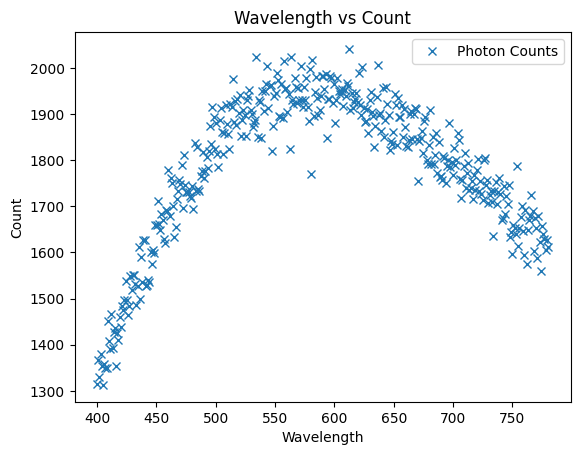

In [ ]:
import random
import numpy as np
import collections
import matplotlib.pyplot as plt

def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelengths, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelengths[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    sorted_counts = sorted(photon_counts.items(), key=lambda x: x[0])  # Sort by wavelength
    return sorted_counts


def main():
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    num_iterations = int(input("Enter the number of iterations: "))

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")

        num_photons = int(input("Enter the number of photons to generate: "))

        simulated_photons = generate_simulated_photons(wave_prob, num_photons)
        print(simulated_photons)
        print("Length:", len(simulated_photons))

        photon_counts = count_photons_by_wavelength(simulated_photons)
        sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength

        print("Photon Counts:")
        for wavelength, count in sorted_counts:
            print("Wavelength:", wavelength, "- Count:", count)

        sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
        sorted_counts_values = [count for _, count in sorted_counts]

        plt.plot(sorted_wavelengths, sorted_counts_values, 'x', label="Photon Counts")

        plt.xlabel("Wavelength")
        plt.ylabel("Count")
        plt.title("Wavelength vs Count")
        plt.legend()

        plt.show()

        print("\n")


if __name__ == '__main__':
    main()

In [ ]:
# Step8(c):- Split the def main() function into many user-defined function.

Enter the number of iterations: 1
Enter the number of photons to generate: 666666
Iteration 1:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1821
Wavelength: 490.23746701846966 - Count: 1819
Wavelength: 491.2401055408971 - Count: 1818
Wavelength: 492.24274406332455 - Count: 1926
Wavelength: 493.24538258575194 - Count: 1781
Wavelength: 494.2480211081794 - Count: 1819
Wavelength: 495.25065963060683 - Count: 1739
Wavelength: 496.2532981530343 - Count: 1871
Wavelength: 497.2559366754617 - Count: 1837
Wavelength: 498.2585751978892 - Count: 1774
Wavelength: 499.2612137203166 - Count: 1802
Wavelength: 500.26385224274406 - Count: 1805
Wavelength: 501.2664907651715 - Count: 1761
Wavelength: 502.26912928759896 - Count: 1841
Wavelength: 503.2717678100264 - Count: 1861
Wavelength: 504.27440633245385 - Count: 1933
Wavelength: 505.27704485488124 - Count: 1860
Wavelength: 506.2796833773087 - Count: 1778
Wavelength: 507.28232189973613 - Count: 1770
Wavelength: 508.2849604221636 - Count: 1854
Wavelength: 509.287598944591 - Count: 1763
Wavelength: 510.29023746701847 - Count: 1811
Wavelength: 511.2928759894459 - Count: 1829
Wavelength: 512.29

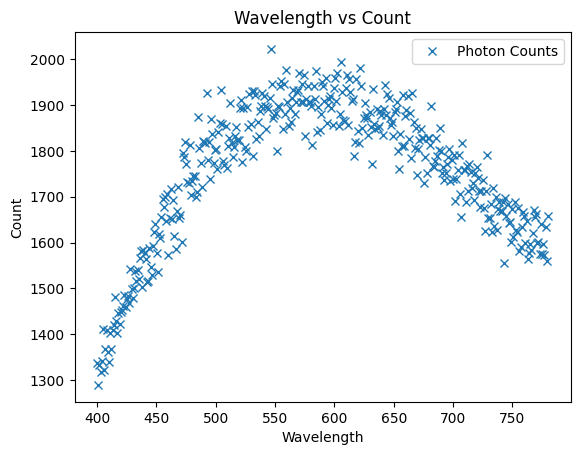

In [ ]:
import random
import numpy as np
import collections
import matplotlib.pyplot as plt


def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelengths, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelengths[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    sorted_counts = sorted(photon_counts.items(), key=lambda x: x[0])  # Sort by wavelength
    return sorted_counts


def get_user_input():
    num_iterations = int(input("Enter the number of iterations: "))
    num_photons = int(input("Enter the number of photons to generate: "))
    return num_iterations, num_photons


def print_simulated_photons(simulated_photons):
    print(simulated_photons)
    print("Length:", len(simulated_photons))


def print_photon_counts(sorted_counts):
    print("Photon Counts:")
    for wavelength, count in sorted_counts:
        print("Wavelength:", wavelength, "- Count:", count)


def plot_photon_counts(sorted_counts):
    sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
    sorted_counts_values = [count for _, count in sorted_counts]

    plt.plot(sorted_wavelengths, sorted_counts_values, 'x', label="Photon Counts")

    plt.xlabel("Wavelength")
    plt.ylabel("Count")
    plt.title("Wavelength vs Count")
    plt.legend()

    plt.show()


def simulate_photon_counts(spectrum, num_photons):
    simulated_photons = generate_simulated_photons(wave_prob, num_photons)
    print_simulated_photons(simulated_photons)

    photon_counts = count_photons_by_wavelength(simulated_photons)
    sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength
    print_photon_counts(sorted_counts)

    plot_photon_counts(sorted_counts)


def main():
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    num_iterations, num_photons = get_user_input()

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")
        simulate_photon_counts(wave_prob, num_photons)
        print("\n")


if __name__ == '__main__':
    main()

In [ ]:
#Step9: Plot a graph between expectation value vs wavlength where expectation_value= Probability_distribution * num_photons

Enter the number of iterations: 1
Iteration 1:
Enter the number of photons to generate: 777
[(611.5567282321899, 2.0276123910604884), (566.4379947229552, 2.1891186882802307), (610.5540897097625, 2.0309420916162493), (540.3693931398417, 2.2947265625), (440.1055408970976, 2.817505995203837), (421.05540897097626, 2.9449805740067676), (530.3430079155673, 2.338109452736318), (697.7836411609499, 1.7770551312107692), (465.17150395778367, 2.6656834940442424), (622.5857519788918, 1.991693507374131), (447.1240105540897, 2.773279830048389), (678.7335092348285, 1.8269320478930182), (408.0211081794195, 3.039058458354889), (423.06068601583115, 2.931021579144318), (596.5171503957783, 2.0787331917905165), (437.0976253298153, 2.8368948448629725), (683.7467018469656, 1.81353708420159), (686.7546174142481, 1.805593975718457), (647.6517150395778, 1.914609304978408), (567.4406332453825, 2.1852506277317962), (684.7493403693932, 1.810881627620222), (465.17150395778367, 2.6656834940442424), (739.8944591029024

ValueError: ignored

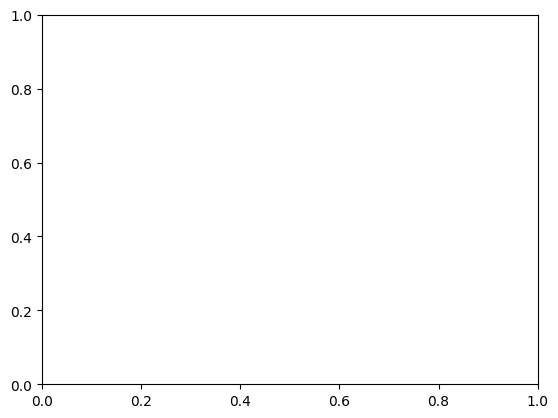

In [ ]:
import random
import numpy as np
import collections
import matplotlib.pyplot as plt

def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelengths, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelengths[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def calculate_expectation_value(simulated_photons, spectrum, num_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    probability_distribution = [prob / num_photons for _, prob in spectrum]

    expectation_value = [wavelength * count for (wavelength, _), count in zip(spectrum, photon_counts.values())]
    expectation_value = [expectation * prob for expectation, prob in zip(expectation_value, probability_distribution)]

    return expectation_value


def main():
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    num_iterations = int(input("Enter the number of iterations: "))

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")

        num_photons = int(input("Enter the number of photons to generate: "))

        simulated_photons = generate_simulated_photons(wave_prob, num_photons)
        print(simulated_photons)
        print("Length:", len(simulated_photons))

        expectation_values = calculate_expectation_value(simulated_photons, wave_prob, num_photons)

        wavelengths = [wavelength for wavelength, _ in spectrum]

        plt.figure()
        plt.plot(wavelengths, expectation_values)
        plt.xlabel('Wavelength')
        plt.ylabel('Expectation Value')
        plt.title(f'Expectation Values vs. Wavelength - Iteration {i}')
        plt.show()

        print("\n")


if __name__ == '__main__':
    main()

In [ ]:
# Step9(b)- Define a expectation value as expectation_value= Probability_distribution * num_photons

In [ ]:
num_photons= int(input("Enter the number of photons:- "))
Expectation_value= probabilities * num_photons
print(Expectation_value)

Enter the number of photons:- 7777
[15.24117028 15.32497369 15.40833977 15.49126436 15.57374344 15.65577304
 15.73734932 15.81846852 15.89912698 15.97932114 16.05904752 16.13830274
 16.21708351 16.29538665 16.37320904 16.45054767 16.52739961 16.60376203
 16.67963218 16.75500739 16.8298851  16.9042628  16.97813811 17.05150868
 17.12437229 17.19672677 17.26857006 17.33990016 17.41071515 17.4810132
 17.55079255 17.62005152 17.6887885  17.75700198 17.82469048 17.89185264
 17.95848714 18.02459276 18.09016832 18.15521274 18.21972499 18.28370412
 18.34714924 18.41005952 18.47243422 18.53427265 18.59557418 18.65633825
 18.71656437 18.7762521  18.83540107 18.89401095 18.9520815  19.00961252
 19.06660387 19.12305547 19.17896729 19.23433936 19.28917177 19.34346466
 19.39721821 19.45043266 19.50310832 19.55524552 19.60684466 19.65790618
 19.70843057 19.75841838 19.80787017 19.85678659 19.9051683  19.95301604
 20.00033055 20.04711265 20.09336318 20.13908302 20.18427312 20.22893443
 20.27306797 20.3

In [ ]:
# Step9(c)-: plot a graph between expectation_value vs wavelength

Enter the number of photons: 78998


ValueError: ignored

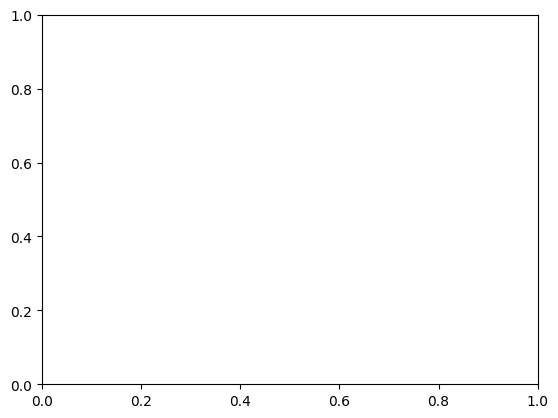

In [ ]:
def generate_expectation_value(wavelength, temperature, num_photons):
    probability_distribution = generate_probability_distribution(wavelength, temperature)
    expectation_value = probability_distribution * num_photons
    return expectation_value

def plot_expectation_value(wavelength, temperature, num_photons):
    expectation_value = generate_expectation_value(wavelength, temperature, num_photons)

    # Plot the expectation value
    plt.plot(wavelength, expectation_value)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Expectation Value')
    plt.title('Expectation Value vs Wavelength')
    plt.show()

# Example usage
wavelength = np.linspace(min_wavelength, max_wavelength, 380)  # Wavelength range in nanometers
temperature = 5000  # Temperature in Kelvin
num_photons = int(input("Enter the number of photons: "))
plot_expectation_value(wavelength, temperature, num_photons)

In [ ]:
# Step9(d)- plot the two above graph on the same graph where expectation_value and count should be on the y_axis and wavelength on the x_axis.

Enter the number of iterations: 1
Iteration 1:
Enter the number of photons to generate: 677787


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1812
Wavelength: 500.26385224274406 - Count: 1844
Wavelength: 501.2664907651715 - Count: 1833
Wavelength: 502.26912928759896 - Count: 1848
Wavelength: 503.2717678100264 - Count: 1906
Wavelength: 504.27440633245385 - Count: 1786
Wavelength: 505.27704485488124 - Count: 1857
Wavelength: 506.2796833773087 - Count: 1935
Wavelength: 507.28232189973613 - Count: 1802
Wavelength: 508.2849604221636 - Count: 1801
Wavelength: 509.287598944591 - Count: 1777
Wavelength: 510.29023746701847 - Count: 1829
Wavelength: 511.2928759894459 - Count: 1833
Wavelength: 512.2955145118733 - Count: 1923
Wavelength: 513.2981530343008 - Count: 1874
Wavelength: 514.3007915567282 - Count: 1836
Wavelength: 515.3034300791556 - Count: 1842
Wavelength: 516.3060686015831 - Count: 1914
Wavelength: 517.3087071240105 - Count: 1896
Wavelength: 518.311345646438 - Count: 1896
Wavelength: 519.3139841688654 - Count: 1918
Wavelength: 520.3166226912929 - Count: 1939
Wavelength: 521.3192612137203 - Count: 1885
Wavelength: 522.3218997

ValueError: ignored

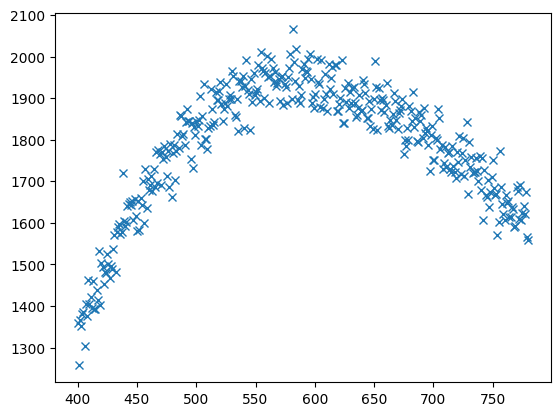

In [ ]:
import random
import numpy as np
import collections
import matplotlib.pyplot as plt

def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelengths, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelengths[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    sorted_counts = sorted(photon_counts.items(), key=lambda x: x[0])  # Sort by wavelength
    return sorted_counts


def generate_expectation_value(wavelength, temperature, num_photons):
    probability_distribution = generate_probability_distribution(wavelength, temperature)
    expectation_value = probability_distribution * num_photons
    return expectation_value


def main():
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    num_iterations = int(input("Enter the number of iterations: "))

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")

        num_photons = int(input("Enter the number of photons to generate: "))

        simulated_photons = generate_simulated_photons(wave_prob, num_photons)
        print(simulated_photons)
        print("Length:", len(simulated_photons))

        photon_counts = count_photons_by_wavelength(simulated_photons)
        sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength

        print("Photon Counts:")
        for wavelength, count in sorted_counts:
            print("Wavelength:", wavelength, "- Count:", count)

        sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
        sorted_counts_values = [count for _, count in sorted_counts]

        # Generate expectation values
        expectation_values = generate_expectation_value(sorted_wavelengths, temperature, num_photons)

        plt.plot(sorted_wavelengths, sorted_counts_values, 'x', label="Photon Counts")
        plt.plot(sorted_wavelengths, expectation_values, 'o', label="Expectation Value", linewidth=0.1)  # Set line width

        plt.xlabel("Wavelength")
        plt.ylabel("Value")
        plt.title("Wavelength vs Value")
        plt.legend()

        plt.show()

        print("\n")


if __name__ == '__main__':
    main()

In [ ]:
# Step9(e):- Split the def main() function into many user-defined functions.

Enter the number of iterations: 1
Enter the number of photons to generate: 22334
Iteration 1:
[(677.730870712401, 1.8296348205247996), (728.8654353562006, 1.7012742542716477), (527.3350923482849, 2.3514460122085463), (468.17941952506595, 2.6485572587917043), (610.5540897097625, 2.0309420916162493), (571.4511873350923, 2.1699141194939515), (756.9393139841688, 1.6381762409369771), (643.6411609498681, 1.9265393129458064), (685.7519788918205, 1.8082339361292807), (502.26912928759896, 2.4687959655389786), (555.4089709762533, 2.2325890736342044), (772.9815303430079, 1.604178044784271), (528.3377308707124, 2.3469836196564122), (757.9419525065963, 1.636009190280582), (508.2849604221636, 2.439576411960133), (607.5461741424801, 2.0409971336749764), (696.7810026385224, 1.7796122387155409), (633.6147757255936, 1.9570250687099193), (709.8153034300792, 1.7469333135082892), (427.0712401055409, 2.903496849128877), (664.6965699208442, 1.8655128612257863), (534.353562005277, 2.320560932253605), (743.905

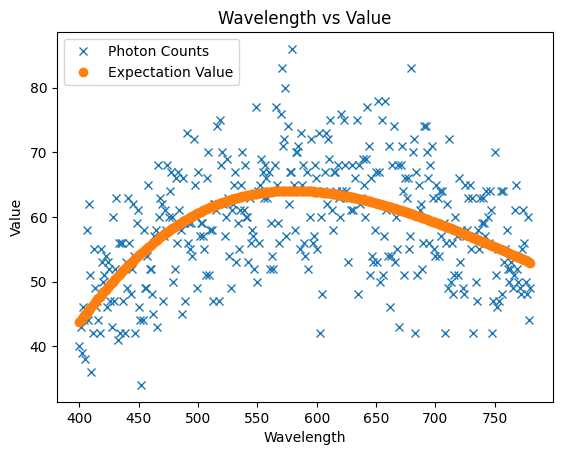

In [ ]:
import random
import numpy as np
import collections
import matplotlib.pyplot as plt


def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelengths, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelengths[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    sorted_counts = sorted(photon_counts.items(), key=lambda x: x[0])  # Sort by wavelength
    return sorted_counts


def generate_expectation_value(wavelengths, temperature, num_photons):
    probability_distribution = generate_probability_distribution(wavelengths, temperature)
    expectation_values = probability_distribution * num_photons
    return expectation_values


def get_user_input():
    num_iterations = int(input("Enter the number of iterations: "))
    num_photons = int(input("Enter the number of photons to generate: "))
    return num_iterations, num_photons


def print_simulated_photons(simulated_photons):
    print(simulated_photons)
    print("Length:", len(simulated_photons))


def print_photon_counts(sorted_counts):
    print("Photon Counts:")
    for wavelength, count in sorted_counts:
        print("Wavelength:", wavelength, "- Count:", count)


def plot_photon_counts(sorted_counts, expectation_values):
    sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
    sorted_counts_values = [count for _, count in sorted_counts]

    plt.plot(sorted_wavelengths, sorted_counts_values, 'x', label="Photon Counts")
    plt.plot(sorted_wavelengths, expectation_values, 'o', label="Expectation Value", linewidth=0.1)  # Set line width

    plt.xlabel("Wavelength")
    plt.ylabel("Value")
    plt.title("Wavelength vs Value")
    plt.legend()

    plt.show()


def simulate_photon_counts(spectrum, num_photons):
    simulated_photons = generate_simulated_photons(wave_prob, num_photons)
    print_simulated_photons(simulated_photons)

    photon_counts = count_photons_by_wavelength(simulated_photons)
    sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength
    print_photon_counts(sorted_counts)

    sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
    expectation_values = generate_expectation_value(sorted_wavelengths, temperature, num_photons)

    plot_photon_counts(sorted_counts, expectation_values)


def perform_simulation(spectrum):
    num_iterations, num_photons = get_user_input()

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")
        simulate_photon_counts(wave_prob, num_photons)
        print("\n")


if __name__ == '__main__':
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum
    perform_simulation(spectrum)

In [ ]:
# Step10:- Find the residuals against the wavelength by using distance formula.

Enter the number of iterations: 1
Iteration 1:
Enter the number of photons to generate: 67777
[(520.3166226912929, 2.3831643002028398), (484.22163588390504, 2.5608108108108105), (752.9287598944591, 1.6469021586767594), (612.5593667546174, 2.024293590627154), (668.707124010554, 1.854324494949495), (546.3852242744063, 2.2694610778443116), (423.06068601583115, 2.931021579144318), (780.0, 1.5897435897435896), (528.3377308707124, 2.3469836196564122), (573.4564643799472, 2.162326309008926), (604.5382585751979, 2.0511522346368714), (726.8601583113457, 1.7059677653550167), (674.7229551451187, 1.83779133427186), (533.3509234828496, 2.324923320470961), (572.4538258575197, 2.166113569321534), (496.2532981530343, 2.4987239472564866), (769.9736147757255, 1.6104447947364815), (580.4749340369393, 2.136181818181818), (657.6781002638522, 1.8854208457032817), (470.18469656992085, 2.6372615039281704), (511.2928759894459, 2.4252244813706265), (727.862796833773, 1.7036177771333287), (534.353562005277, 2.32

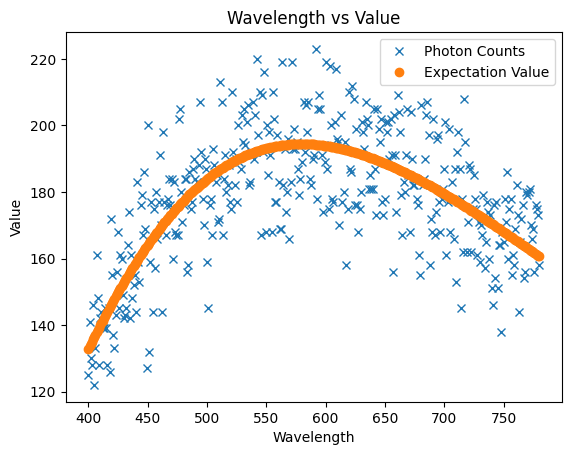

Residuals:
Wavelength: 400.0 - Residual: 7.8276711236872245
Wavelength: 401.00263852242745 - Residual: 7.441977372433399
Wavelength: 402.0052770448549 - Residual: 4.284562730828867
Wavelength: 403.00791556728234 - Residual: 7.007255329624343
Wavelength: 404.0105540897098 - Residual: 10.273934828838406
Wavelength: 405.01319261213723 - Residual: 14.440957848303952
Wavelength: 406.0158311345646 - Residual: 4.1518997940350175
Wavelength: 407.01846965699207 - Residual: 23.14114172420028
Wavelength: 408.0211081794195 - Residual: 9.438198610274696
Wavelength: 409.02374670184696 - Residual: 11.260698054728465
Wavelength: 410.0263852242744 - Residual: 2.044481993487949
Wavelength: 411.02902374670185 - Residual: 3.353768208543073
Wavelength: 412.0316622691293 - Residual: 2.3328107604135653
Wavelength: 413.03430079155675 - Residual: 3.0152270623986226
Wavelength: 414.0369393139842 - Residual: 2.3065463618004287
Wavelength: 415.0395778364116 - Residual: 4.367464213893527
Wavelength: 416.0422163588

In [ ]:
import random
import numpy as np
import collections
import matplotlib.pyplot as plt

def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelengths, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelengths[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    sorted_counts = sorted(photon_counts.items(), key=lambda x: x[0])  # Sort by wavelength
    return sorted_counts


def generate_expectation_value(wavelength, temperature, num_photons):
    probability_distribution = generate_probability_distribution(wavelength, temperature)
    expectation_value = probability_distribution * num_photons
    return expectation_value


def calculate_residuals(wavelength, count_values, expectation_values):
    residuals = [abs(count - expectation) for count, expectation in zip(count_values, expectation_values)]
    return residuals


def main():
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    num_iterations = int(input("Enter the number of iterations: "))

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")

        num_photons = int(input("Enter the number of photons to generate: "))

        simulated_photons = generate_simulated_photons(wave_prob, num_photons)
        print(simulated_photons)
        print("Length:", len(simulated_photons))

        photon_counts = count_photons_by_wavelength(simulated_photons)
        sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength

        print("Photon Counts:")
        for wavelength, count in sorted_counts:
            print("Wavelength:", wavelength, "- Count:", count)

        sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
        sorted_counts_values = [count for _, count in sorted_counts]

        # Generate expectation values
        expectation_values = generate_expectation_value(sorted_wavelengths, temperature, num_photons)

        plt.plot(sorted_wavelengths, sorted_counts_values, 'x', label="Photon Counts")
        plt.plot(sorted_wavelengths, expectation_values, 'o', label="Expectation Value", linewidth=2.0)  # Set line width

        plt.xlabel("Wavelength")
        plt.ylabel("Value")
        plt.title("Wavelength vs Value")
        plt.legend()

        plt.show()

        # Calculate residuals
        residuals = calculate_residuals(sorted_wavelengths, sorted_counts_values, expectation_values)
        print("Residuals:")
        for wavelength, residual in zip(sorted_wavelengths, residuals):
            print("Wavelength:", wavelength, "- Residual:", residual)

        print("\n")


if __name__ == '__main__':
    main()


In [ ]:
# Step10(b)- Split the def main() function into many user-defined function in the above program.

Enter the number of iterations: 1
Enter the number of photons to generate: 766868
Iteration 1:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 2053
Wavelength: 506.2796833773087 - Count: 2077
Wavelength: 507.28232189973613 - Count: 2086
Wavelength: 508.2849604221636 - Count: 2110
Wavelength: 509.287598944591 - Count: 2169
Wavelength: 510.29023746701847 - Count: 2172
Wavelength: 511.2928759894459 - Count: 2026
Wavelength: 512.2955145118733 - Count: 2056
Wavelength: 513.2981530343008 - Count: 2117
Wavelength: 514.3007915567282 - Count: 2103
Wavelength: 515.3034300791556 - Count: 2163
Wavelength: 516.3060686015831 - Count: 2226
Wavelength: 517.3087071240105 - Count: 2199
Wavelength: 518.311345646438 - Count: 2066
Wavelength: 519.3139841688654 - Count: 2140
Wavelength: 520.3166226912929 - Count: 2100
Wavelength: 521.3192612137203 - Count: 2154
Wavelength: 522.3218997361478 - Count: 2143
Wavelength: 523.3245382585752 - Count: 2129
Wavelength: 524.3271767810027 - Count: 2081
Wavelength: 525.3298153034301 - Count: 2115
Wavelength: 526.3324538258576 - Count: 2092
Wavelength: 527.3350923482849 - Count: 2175
Wavelength: 528.3377308707

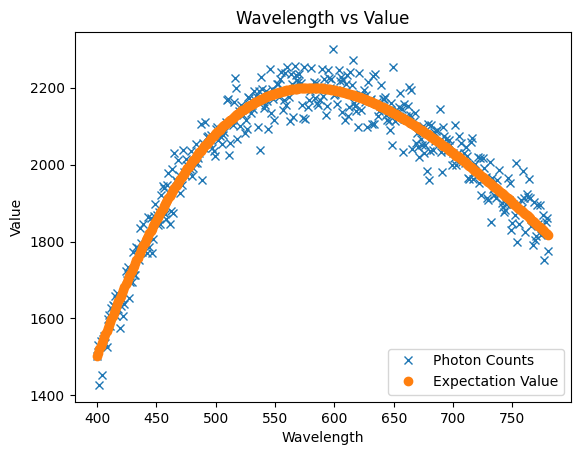

Residuals:
Wavelength: 400.0 - Residual: 0.888745433993563
Wavelength: 401.00263852242745 - Residual: 19.84763715778604
Wavelength: 402.0052770448549 - Residual: 92.37285586947291
Wavelength: 403.00791556728234 - Residual: 12.450183983971556
Wavelength: 404.0105540897098 - Residual: 82.68284441150172
Wavelength: 405.01319261213723 - Residual: 2.228448246261223
Wavelength: 406.0158311345646 - Residual: 1.1844417538095513
Wavelength: 407.01846965699207 - Residual: 23.814493533882796
Wavelength: 408.0211081794195 - Residual: 42.76799663803149
Wavelength: 409.02374670184696 - Residual: 23.324284110634608
Wavelength: 410.0263852242744 - Residual: 24.46269113979838
Wavelength: 411.02902374670185 - Residual: 12.352442295336232
Wavelength: 412.0316622691293 - Residual: 28.87920795820378
Wavelength: 413.03430079155675 - Residual: 27.15795702247783
Wavelength: 414.0369393139842 - Residual: 18.484111060996838
Wavelength: 415.0395778364116 - Residual: 36.85796735205008
Wavelength: 416.042216358839

In [ ]:
import random
import numpy as np
import collections
import matplotlib.pyplot as plt


def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelengths, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelengths[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    sorted_counts = sorted(photon_counts.items(), key=lambda x: x[0])  # Sort by wavelength
    return sorted_counts


def generate_expectation_value(wavelengths, temperature, num_photons):
    probability_distribution = generate_probability_distribution(wavelengths, temperature)
    expectation_values = probability_distribution * num_photons
    return expectation_values


def calculate_residuals(wavelengths, count_values, expectation_values):
    residuals = [abs(count - expectation) for count, expectation in zip(count_values, expectation_values)]
    return residuals


def get_user_input():
    num_iterations = int(input("Enter the number of iterations: "))
    num_photons = int(input("Enter the number of photons to generate: "))
    return num_iterations, num_photons


def print_simulated_photons(simulated_photons):
    print(simulated_photons)
    print("Length:", len(simulated_photons))


def print_photon_counts(sorted_counts):
    print("Photon Counts:")
    for wavelength, count in sorted_counts:
        print("Wavelength:", wavelength, "- Count:", count)


def plot_photon_counts(sorted_counts, expectation_values):
    sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
    sorted_counts_values = [count for _, count in sorted_counts]

    plt.plot(sorted_wavelengths, sorted_counts_values, 'x', label="Photon Counts")
    plt.plot(sorted_wavelengths, expectation_values, 'o', label="Expectation Value", linewidth=2.0)  # Set line width

    plt.xlabel("Wavelength")
    plt.ylabel("Value")
    plt.title("Wavelength vs Value")
    plt.legend()

    plt.show()


def print_residuals(sorted_wavelengths, residuals):
    print("Residuals:")
    for wavelength, residual in zip(sorted_wavelengths, residuals):
        print("Wavelength:", wavelength, "- Residual:", residual)


def simulate_photon_counts(spectrum, num_photons):
    simulated_photons = generate_simulated_photons(wave_prob, num_photons)
    print_simulated_photons(simulated_photons)

    photon_counts = count_photons_by_wavelength(simulated_photons)
    sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength
    print_photon_counts(sorted_counts)

    sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
    expectation_values = generate_expectation_value(sorted_wavelengths, temperature, num_photons)

    plot_photon_counts(sorted_counts, expectation_values)

    # Calculate residuals
    # residuals = calculate_residuals(sorted_wavelengths, [count for _, count in sorted_counts], expectation_values)
    residuals = calculate_residuals(sorted_wavelengths, [count for _, count in sorted_counts], expectation_values)
    print_residuals(sorted_wavelengths, residuals)


def main():
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    num_iterations, num_photons = get_user_input()

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")
        simulate_photon_counts(wave_prob, num_photons)
        print("\n")


if __name__ == '__main__':
    main()

In [ ]:
# Step11:- Plot a graph between residuals and wavelength

Enter the number of iterations: 1
Iteration 1:
Enter the number of photons to generate: 8888
[(467.1767810026385, 2.6542415000564783), (444.1160949868074, 2.7920627376425853), (597.5197889182058, 2.0752450763931822), (608.5488126649077, 2.0376344086021505), (773.9841688654353, 1.602099952273812), (567.4406332453825, 2.1852506277317962), (540.3693931398417, 2.2947265625), (737.8891820580475, 1.680469141099907), (770.976253298153, 1.608350444900753), (569.4459102902374, 2.177555370215921), (639.6306068601583, 1.938618925831202), (557.4142480211082, 2.22455741740036), (711.820580474934, 1.7420120097857514), (530.3430079155673, 2.338109452736318), (449.1292875989446, 2.7608976618493712), (767.9683377308706, 1.6146499003641863), (648.6543535620053, 1.911649853563293), (532.3482849604221, 2.3293021411578114), (594.5118733509235, 2.085744718622404), (678.7335092348285, 1.8269320478930182), (655.6728232189973, 1.8911871227364185), (562.4274406332454, 2.2047288421842746), (467.1767810026385, 2.

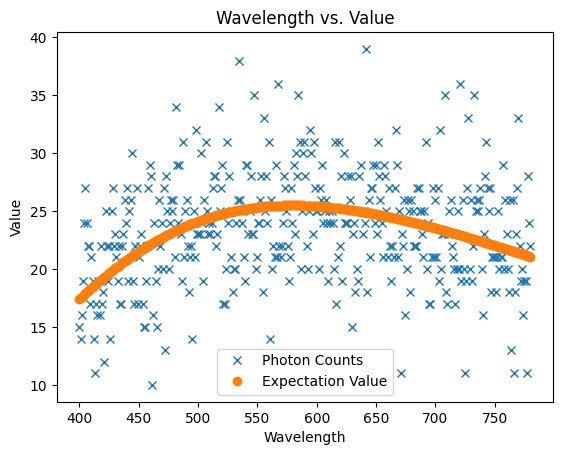

Residuals:
Wavelength: 400.0 - Residual: 2.418480324406982
Wavelength: 401.00263852242745 - Residual: 3.5142556488751637
Wavelength: 402.0052770448549 - Residual: 1.609531161774747
Wavelength: 403.00791556728234 - Residual: 1.2956978714062117
Wavelength: 404.0105540897098 - Residual: 6.201436073575337
Wavelength: 405.01319261213723 - Residual: 9.107687956744535
Wavelength: 406.0158311345646 - Residual: 6.014457922755753
Wavelength: 407.01846965699207 - Residual: 3.9217502640230784
Wavelength: 408.0211081794195 - Residual: 3.8295691642905645
Wavelength: 409.02374670184696 - Residual: 1.2620813005949891
Wavelength: 410.0263852242744 - Residual: 2.646802838103202
Wavelength: 411.02902374670185 - Residual: 0.556225442812913
Wavelength: 412.0316622691293 - Residual: 4.533809729532965
Wavelength: 413.03430079155675 - Residual: 7.623299026669802
Wavelength: 414.0369393139842 - Residual: 1.712238900162557
Wavelength: 415.0395778364116 - Residual: 2.800625904555904
Wavelength: 416.042216358839 

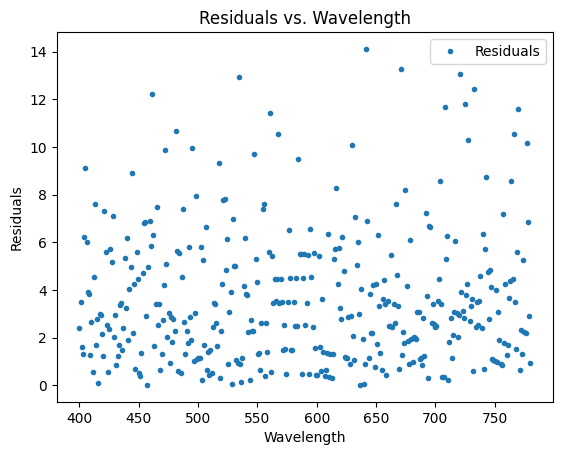

In [ ]:
def plot_residuals(wavelength, residuals):
    plt.plot(wavelength, residuals, '.', label="Residuals")

    plt.xlabel("Wavelength")
    plt.ylabel("Residuals")
    plt.title("Residuals vs. Wavelength")
    plt.legend()

    plt.show()


def main():
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    num_iterations = int(input("Enter the number of iterations: "))

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")

        num_photons = int(input("Enter the number of photons to generate: "))

        simulated_photons = generate_simulated_photons(wave_prob, num_photons)
        print(simulated_photons)
        print("Length:", len(simulated_photons))

        photon_counts = count_photons_by_wavelength(simulated_photons)
        sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength

        print("Photon Counts:")
        for wavelength, count in sorted_counts:
            print("Wavelength:", wavelength, "- Count:", count)

        sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
        sorted_counts_values = [count for _, count in sorted_counts]

        # Generate expectation values
        expectation_values = generate_expectation_value(sorted_wavelengths, temperature, num_photons)

        plt.plot(sorted_wavelengths, sorted_counts_values, 'x', label="Photon Counts")
        plt.plot(sorted_wavelengths, expectation_values, 'o', label="Expectation Value", linewidth=0.8)  # Set line width

        plt.xlabel("Wavelength")
        plt.ylabel("Value")
        plt.title("Wavelength vs. Value")
        plt.legend()

        plt.show()

        # Calculate residuals
        residuals = calculate_residuals(sorted_wavelengths, sorted_counts_values, expectation_values)
        print("Residuals:")
        for wavelength, residual in zip(sorted_wavelengths, residuals):
            print("Wavelength:", wavelength, "- Residual:", residual)

        # Plot residuals vs wavelength
        plot_residuals(sorted_wavelengths, residuals)

        print("\n")


if __name__ == '__main__':
    main()

In [ ]:
# Step11(b):- Split the def main() function into many user-defined function in the above program

Enter the number of iterations: 1
Enter the number of photons to generate: 22298
Iteration 1:
[(600, 2.066666666666667), (600, 2.066666666666667), (700, 1.7714285714285714), (600, 2.066666666666667), (600, 2.066666666666667), (500, 2.48), (500, 2.48), (600, 2.066666666666667), (500, 2.48), (500, 2.48), (700, 1.7714285714285714), (600, 2.066666666666667), (500, 2.48), (600, 2.066666666666667), (700, 1.7714285714285714), (600, 2.066666666666667), (600, 2.066666666666667), (600, 2.066666666666667), (500, 2.48), (700, 1.7714285714285714), (600, 2.066666666666667), (600, 2.066666666666667), (500, 2.48), (600, 2.066666666666667), (500, 2.48), (700, 1.7714285714285714), (600, 2.066666666666667), (500, 2.48), (500, 2.48), (500, 2.48), (500, 2.48), (700, 1.7714285714285714), (500, 2.48), (600, 2.066666666666667), (500, 2.48), (700, 1.7714285714285714), (500, 2.48), (600, 2.066666666666667), (600, 2.066666666666667), (600, 2.066666666666667), (600, 2.066666666666667), (600, 2.066666666666667), (

ValueError: ignored

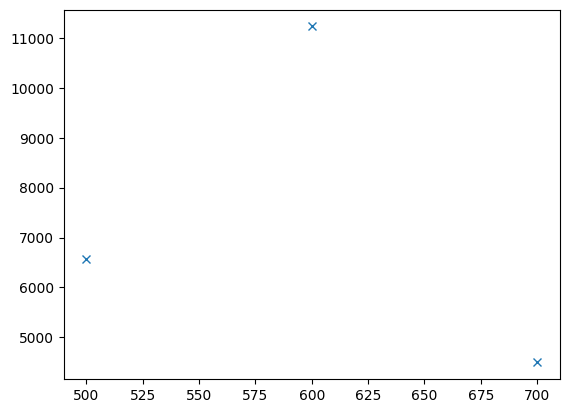

In [ ]:
import random
import numpy as np
import collections
import matplotlib.pyplot as plt


def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelengths, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelengths[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    sorted_counts = sorted(photon_counts.items(), key=lambda x: x[0])  # Sort by wavelength
    return sorted_counts


def generate_expectation_value(wavelengths, temperature, num_photons):
    probability_distribution = generate_probability_distribution(wavelengths, temperature)
    expectation_values = probability_distribution * num_photons
    return expectation_values


def calculate_residuals(wavelengths, count_values, expectation_values):
    residuals = [abs(count - expectation) for count, expectation in zip(count_values, expectation_values)]
    return residuals


def get_user_input():
    num_iterations = int(input("Enter the number of iterations: "))
    num_photons = int(input("Enter the number of photons to generate: "))
    return num_iterations, num_photons


def print_simulated_photons(simulated_photons):
    print(simulated_photons)
    print("Length:", len(simulated_photons))


def print_photon_counts(sorted_counts):
    print("Photon Counts:")
    for wavelength, count in sorted_counts:
        print("Wavelength:", wavelength, "- Count:", count)


def plot_photon_counts(sorted_counts, expectation_values):
    sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
    sorted_counts_values = [count for _, count in sorted_counts]

    plt.plot(sorted_wavelengths, sorted_counts_values, 'x', label="Photon Counts")
    plt.plot(sorted_wavelengths, expectation_values, 'o', label="Expectation Value", linewidth=2.0)  # Set line width

    plt.xlabel("Wavelength")
    plt.ylabel("Value")
    plt.title("Wavelength vs Value")
    plt.legend()

    plt.show()


def print_residuals(sorted_wavelengths, residuals):
    print("Residuals:")
    for wavelength, residual in zip(sorted_wavelengths, residuals):
        print("Wavelength:", wavelength, "- Residual:", residual)


def plot_residuals(wavelengths, residuals):
    plt.plot(wavelengths, residuals, '.', label="Residuals")

    plt.xlabel("Wavelength")
    plt.ylabel("Residuals")
    plt.title("Residuals vs. Wavelength")
    plt.legend()

    plt.show()


def simulate_photon_counts(spectrum, num_photons):
    simulated_photons = generate_simulated_photons(wave_prob, num_photons)
    print_simulated_photons(simulated_photons)

    photon_counts = count_photons_by_wavelength(simulated_photons)
    sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength
    print_photon_counts(sorted_counts)

    sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
    sorted_counts_values = [count for _, count in sorted_counts]

    # Generate expectation values
    expectation_values = generate_expectation_value(sorted_wavelengths, temperature, num_photons)

    plot_photon_counts(sorted_counts, expectation_values)

    # Calculate residuals
    residuals = calculate_residuals(sorted_wavelengths, sorted_counts_values, expectation_values)
    print_residuals(sorted_wavelengths, residuals)

    # Plot residuals vs wavelength
    plot_residuals(sorted_wavelengths, residuals)


def main():
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    num_iterations, num_photons = get_user_input()

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")
        simulate_photon_counts(wave_prob, num_photons)
        print("\n")


if __name__ == '__main__':
    main()

In [ ]:
!pip install astropy

In [ ]:
from astropy.io import fits

In [ ]:
fits_image_filename = '/spDR2-000.fit'#fits.util.get_testdata_filepath('C:\\Users\\Deepak\\Downloads\\spDR2-000.fit')

hdul = fits.open(fits_image_filename)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# step sixth(a)- Create a program for many iterations where num_photons and wavelength_filter will remain the same which should be defined in the beginning.

In [ ]:
import random
import numpy as np
import collections


def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelengths, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelengths[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    sorted_counts = sorted(photon_counts.items(), key=lambda x: x[0])  # Sort by wavelength
    return sorted_counts


def get_user_input():
    num_photons = int(input("Enter the number of photons to generate: "))
    wavelength_start_point = int(input("Enter the start point of wavelength range: "))
    wavelength_end_point = int(input("Enter the end point of wavelength range: "))
    num_iterations = int(input("Enter the number of iterations: "))

    return num_photons, wavelength_start_point, wavelength_end_point, num_iterations


def print_simulated_photons(simulated_photons):
    print(simulated_photons)
    print("Length:", len(simulated_photons))


def print_photon_counts(sorted_counts):
    print("Photon Counts:")
    for wavelength, count in sorted_counts:
        print("Wavelength:", wavelength, "- Count:", count)


def print_sorted_wavelengths(sorted_counts):
    sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
    print("Sorted Wavelengths:", sorted_wavelengths)


def print_filtered_counts(filtered_counts, wavelength_start_point, wavelength_end_point):
    print(f"Photon Counts between {wavelength_start_point} and {wavelength_end_point}:")
    for wavelength, count in filtered_counts:
        print("Wavelength:", wavelength, "- Count:", count)

    count_sum = sum(count for wavelength, count in filtered_counts)
    print(f"Sum of counts between {wavelength_start_point} and {wavelength_end_point}: {count_sum}")


def simulate_photon_counts(wave_prob, num_photons, wavelength_start_point, wavelength_end_point):
    simulated_photons = generate_simulated_photons(wave_prob, num_photons)
    print_simulated_photons(simulated_photons)

    photon_counts = count_photons_by_wavelength(simulated_photons)
    sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength
    print_photon_counts(sorted_counts)

    print_sorted_wavelengths(sorted_counts)

    filtered_counts = [(wavelength, count) for wavelength, count in sorted_counts if
                       wavelength_start_point <= wavelength <= wavelength_end_point]
    print_filtered_counts(filtered_counts, wavelength_start_point, wavelength_end_point)


def perform_simulation():
    num_photons, wavelength_start_point, wavelength_end_point, num_iterations = get_user_input()
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")
        simulate_photon_counts(wave_prob, num_photons, wavelength_start_point, wavelength_end_point)
        print("\n")


if __name__ == '__main__':
    perform_simulation()

Enter the number of photons to generate: 828282
Enter the start point of wavelength range: 412
Enter the end point of wavelength range: 678
Enter the number of iterations: 3
Iteration 1:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 2340
Wavelength: 535.0 - Count: 2271
Wavelength: 536.0 - Count: 2358
Wavelength: 537.0 - Count: 2413
Wavelength: 538.0 - Count: 2288
Wavelength: 539.0 - Count: 2401
Wavelength: 540.0 - Count: 2334
Wavelength: 541.0 - Count: 2346
Wavelength: 542.0 - Count: 2449
Wavelength: 543.0 - Count: 2311
Wavelength: 544.0 - Count: 2377
Wavelength: 545.0 - Count: 2375
Wavelength: 546.0 - Count: 2294
Wavelength: 547.0 - Count: 2545
Wavelength: 548.0 - Count: 2375
Wavelength: 549.0 - Count: 2299
Wavelength: 550.0 - Count: 2397
Wavelength: 551.0 - Count: 2347
Wavelength: 552.0 - Count: 2393
Wavelength: 553.0 - Count: 2300
Wavelength: 554.0 - Count: 2379
Wavelength: 555.0 - Count: 2295
Wavelength: 556.0 - Count: 2260
Wavelength: 557.0 - Count: 2376
Wavelength: 558.0 - Count: 2340
Wavelength: 559.0 - Count: 2317
Wavelength: 560.0 - Count: 2268
Wavelength: 561.0 - Count: 2432
Wavelength: 562.0 - Count: 2331
Wavelength: 563.0 - Count: 2261
Wavelength: 564.0 - Count: 2359
Wavelength: 565.0 - Count: 2255
Wa

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 2346
Wavelength: 634.0 - Count: 2336
Wavelength: 635.0 - Count: 2264
Wavelength: 636.0 - Count: 2347
Wavelength: 637.0 - Count: 2302
Wavelength: 638.0 - Count: 2355
Wavelength: 639.0 - Count: 2292
Wavelength: 640.0 - Count: 2363
Wavelength: 641.0 - Count: 2304
Wavelength: 642.0 - Count: 2305
Wavelength: 643.0 - Count: 2265
Wavelength: 644.0 - Count: 2226
Wavelength: 645.0 - Count: 2315
Wavelength: 646.0 - Count: 2230
Wavelength: 647.0 - Count: 2318
Wavelength: 648.0 - Count: 2307
Wavelength: 649.0 - Count: 2240
Wavelength: 650.0 - Count: 2393
Wavelength: 651.0 - Count: 2276
Wavelength: 652.0 - Count: 2233
Wavelength: 653.0 - Count: 2224
Wavelength: 654.0 - Count: 2342
Wavelength: 655.0 - Count: 2303
Wavelength: 656.0 - Count: 2293
Wavelength: 657.0 - Count: 2294
Wavelength: 658.0 - Count: 2262
Wavelength: 659.0 - Count: 2279
Wavelength: 660.0 - Count: 2295
Wavelength: 661.0 - Count: 2321
Wavelength: 662.0 - Count: 2214
Wavelength: 663.0 - Count: 2181
Wavelength: 664.0 - Count: 2362
Wa

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



504.0 - Count: 2232
Wavelength: 505.0 - Count: 2381
Wavelength: 506.0 - Count: 2281
Wavelength: 507.0 - Count: 2308
Wavelength: 508.0 - Count: 2223
Wavelength: 509.0 - Count: 2185
Wavelength: 510.0 - Count: 2289
Wavelength: 511.0 - Count: 2310
Wavelength: 512.0 - Count: 2241
Wavelength: 513.0 - Count: 2229
Wavelength: 514.0 - Count: 2285
Wavelength: 515.0 - Count: 2284
Wavelength: 516.0 - Count: 2349
Wavelength: 517.0 - Count: 2226
Wavelength: 518.0 - Count: 2218
Wavelength: 519.0 - Count: 2349
Wavelength: 520.0 - Count: 2303
Wavelength: 521.0 - Count: 2359
Wavelength: 522.0 - Count: 2288
Wavelength: 523.0 - Count: 2322
Wavelength: 524.0 - Count: 2324
Wavelength: 525.0 - Count: 2316
Wavelength: 526.0 - Count: 2359
Wavelength: 527.0 - Count: 2368
Wavelength: 528.0 - Count: 2293
Wavelength: 529.0 - Count: 2379
Wavelength: 530.0 - Count: 2376
Wavelength: 531.0 - Count: 2388
Wavelength: 532.0 - Count: 2325
Wavelength: 533.0 - Count: 2345
Wavelength: 534.0 - Count: 2243
Wavelength: 535.0 - 

In [ ]:
# Step sixth(b)- Comment out the print statement of photon counts for the with wavelength filter and without wavelength filter.

In [ ]:
import random
import numpy as np
import collections


def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelengths, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelengths[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    sorted_counts = sorted(photon_counts.items(), key=lambda x: x[0])  # Sort by wavelength
    return sorted_counts


def get_user_input():
    num_photons = int(input("Enter the number of photons to generate: "))
    wavelength_start_point = int(input("Enter the start point of wavelength range: "))
    wavelength_end_point = int(input("Enter the end point of wavelength range: "))
    num_iterations = int(input("Enter the number of iterations: "))

    return num_photons, wavelength_start_point, wavelength_end_point, num_iterations


def print_simulated_photons(simulated_photons):
    print(simulated_photons)
    print("Length:", len(simulated_photons))


# def print_photon_counts(sorted_counts):
    #print("Photon Counts:")
    #for wavelength, count in sorted_counts:
     #   print("Wavelength:", wavelength, "- Count:", count)


def print_sorted_wavelengths(sorted_counts):
    sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
    print("Sorted Wavelengths:", sorted_wavelengths)


def print_filtered_counts(filtered_counts, wavelength_start_point, wavelength_end_point):
    #print(f"Photon Counts between {wavelength_start_point} and {wavelength_end_point}:")
    #for wavelength, count in filtered_counts:
     # print("Wavelength:", wavelength, "- Count:", count)


    count_sum = sum(count for wavelength, count in filtered_counts)
    print(f"Sum of counts between {wavelength_start_point} and {wavelength_end_point}: {count_sum}")


def simulate_photon_counts(wave_prob, num_photons, wavelength_start_point, wavelength_end_point):
    simulated_photons = generate_simulated_photons(wave_prob, num_photons)
    #print_simulated_photons(simulated_photons)

    photon_counts = count_photons_by_wavelength(simulated_photons)
    sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength
    #print_photon_counts(sorted_counts)

    #print_sorted_wavelengths(sorted_counts)

    filtered_counts = [(wavelength, count) for wavelength, count in sorted_counts if
                       wavelength_start_point <= wavelength <= wavelength_end_point]
    print_filtered_counts(filtered_counts, wavelength_start_point, wavelength_end_point)


def perform_simulation():
    num_photons, wavelength_start_point, wavelength_end_point, num_iterations = get_user_input()
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")
        simulate_photon_counts(wave_prob, num_photons, wavelength_start_point, wavelength_end_point)
        print("\n")


if __name__ == '__main__':
    perform_simulation()

Enter the number of photons to generate: 567
Enter the start point of wavelength range: 432
Enter the end point of wavelength range: 675
Enter the number of iterations: 5
Iteration 1:
Sum of counts between 432 and 675: 347


Iteration 2:
Sum of counts between 432 and 675: 389


Iteration 3:
Sum of counts between 432 and 675: 384


Iteration 4:
Sum of counts between 432 and 675: 369


Iteration 5:
Sum of counts between 432 and 675: 374




In [ ]:
# Step sixth(c)- Return list of "Sum" of counts

In [ ]:
import random
import numpy as np
import collections


def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelengths, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelengths[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    sorted_counts = sorted(photon_counts.items(), key=lambda x: x[0])  # Sort by wavelength
    return sorted_counts


def get_user_input():
    num_photons = int(input("Enter the number of photons to generate: "))
    wavelength_start_point = int(input("Enter the start point of wavelength range: "))
    wavelength_end_point = int(input("Enter the end point of wavelength range: "))
    num_iterations = int(input("Enter the number of iterations: "))

    return num_photons, wavelength_start_point, wavelength_end_point, num_iterations


def print_simulated_photons(simulated_photons):
    print(simulated_photons)
    print("Length:", len(simulated_photons))


# def print_photon_counts(sorted_counts):
    #print("Photon Counts:")
    #for wavelength, count in sorted_counts:
     #   print("Wavelength:", wavelength, "- Count:", count)


def print_sorted_wavelengths(sorted_counts):
    sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
    print("Sorted Wavelengths:", sorted_wavelengths)


def print_filtered_counts(filtered_counts, wavelength_start_point, wavelength_end_point):
    #print(f"Photon Counts between {wavelength_start_point} and {wavelength_end_point}:")
    #for wavelength, count in filtered_counts:
     # print("Wavelength:", wavelength, "- Count:", count)


    count_sum = sum(count for wavelength, count in filtered_counts)
    print(f"Sum of counts between {wavelength_start_point} and {wavelength_end_point}: {count_sum}")
    return count_sum


def simulate_photon_counts(wave_prob, num_photons, wavelength_start_point, wavelength_end_point):
    simulated_photons = generate_simulated_photons(wave_prob, num_photons)
    #print_simulated_photons(simulated_photons)

    photon_counts = count_photons_by_wavelength(simulated_photons)
    sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength
    #print_photon_counts(sorted_counts)

    #print_sorted_wavelengths(sorted_counts)

    filtered_counts = [(wavelength, count) for wavelength, count in sorted_counts if
                       wavelength_start_point <= wavelength <= wavelength_end_point]
    return print_filtered_counts(filtered_counts, wavelength_start_point, wavelength_end_point)


def perform_simulation():
    SOC= []
    num_photons, wavelength_start_point, wavelength_end_point, num_iterations = get_user_input()
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum
    sum_of_counts_list = []

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")
        sum_of_counts = simulate_photon_counts(wave_prob, num_photons, wavelength_start_point, wavelength_end_point)
        sum_of_counts_list.append(sum_of_counts)
        print("\n")

    print("Sum of Counts for Each Iteration:")
    for iteration, count in enumerate(sum_of_counts_list, start=1):
        SOC.append(count)
    print(SOC)
    print("length of the SOC is:-", len(SOC))


if __name__ == '__main__':
    perform_simulation()

Enter the number of photons to generate: 6789
Enter the start point of wavelength range: 432
Enter the end point of wavelength range: 670
Enter the number of iterations: 654
Iteration 1:
Sum of counts between 432 and 670: 4430


Iteration 2:
Sum of counts between 432 and 670: 4433


Iteration 3:
Sum of counts between 432 and 670: 4462


Iteration 4:
Sum of counts between 432 and 670: 4418


Iteration 5:
Sum of counts between 432 and 670: 4296


Iteration 6:
Sum of counts between 432 and 670: 4385


Iteration 7:
Sum of counts between 432 and 670: 4432


Iteration 8:
Sum of counts between 432 and 670: 4365


Iteration 9:
Sum of counts between 432 and 670: 4446


Iteration 10:
Sum of counts between 432 and 670: 4420


Iteration 11:
Sum of counts between 432 and 670: 4409


Iteration 12:
Sum of counts between 432 and 670: 4488


Iteration 13:
Sum of counts between 432 and 670: 4381


Iteration 14:
Sum of counts between 432 and 670: 4390


Iteration 15:
Sum of counts between 432 and 670: 44